### SVM

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
from sklearn import svm

In [84]:
train_data = scio.loadmat("./ex6data1.mat")
# print(train_data)
X = train_data['X']
Y = train_data['y']
print(X.shape, Y.shape)

(51, 2) (51, 1)


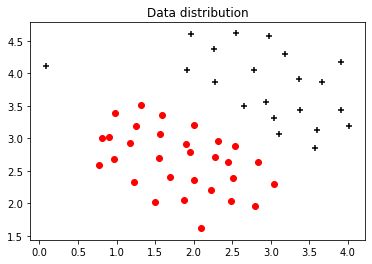

In [86]:
def plot_data(X, Y):
    positive = X[Y[:,0] == 1]
    negative = X[Y[:,0] == 0]

    fig = plt.figure()  
    ax1 = fig.add_subplot(1, 1, 1)  

    ax1.set_title('Data distribution')  
    plt.xlabel('')   
    plt.ylabel('') 

    plt.scatter(positive[:,0], positive[:,1], color='black', marker='+')
    plt.scatter(negative[:,0], negative[:,1], color='red', marker='o')
    return plt
    
plt = plot_data(X, Y)    
plt.show()

[[1.40718563 2.13398052]]
[-10.34889778]


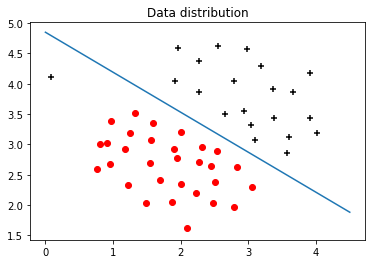

In [88]:
classifier = svm.SVC(C=1, kernel='linear')
classifier.fit(X, Y.ravel())
w = classifier.coef_
b = classifier.intercept_
print(w)
print(b)

plt = plot_data(X, Y)  
w = w.ravel()
x1 = np.arange(0, 5, 0.5)
x2 = (-w[0] * x1 - b) / w[1]
plt.plot(x1, x2)
plt.show()

[[ 4.68150544 13.08944402]]
[-53.13044783]


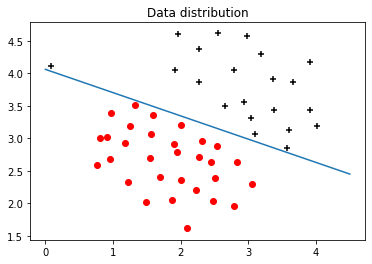

In [89]:
classifier = svm.SVC(C=100, kernel='linear')
classifier.fit(X, Y.ravel())
w = classifier.coef_
b = classifier.intercept_
print(w)
print(b)

plt = plot_data(X, Y)  
w = w.ravel()
x1 = np.arange(0, 5, 0.5)
x2 = (-w[0] * x1 - b) / w[1]
plt.plot(x1, x2)
plt.show()

#### Gaussian kernel

In [120]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-np.sum((x1 - x2) ** 2) / (2 * sigma ** 2))

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussian_kernel(x1, x2, sigma)
print(sim)

0.32465246735834974


(863, 2) (863, 1)


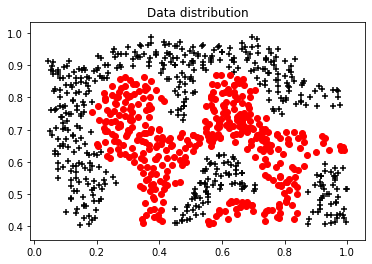

In [95]:
train_data2 = scio.loadmat("./ex6data2.mat")
# print(train_data)
X2 = train_data2['X']
Y2 = train_data2['y']
print(X2.shape, Y2.shape)

plt = plot_data(X2, Y2) 
plt.show()

In [141]:
def kernel(X1, X2):
#     print(X1, X2)
    matrix = np.zeros((len(X1), len(X2)))
    for i in range(len(X1)):
        for j in range(len(X2)):
            matrix[i][j] = gaussian_kernel(X1[i], X2[j], sigma=0.1)
    return matrix

print(kernel(X2[0], X2[1]))

classifier = svm.SVC(C=1, kernel=kernel)
# classifier = svm.SVC(C=100)
print(X2.shape, Y2.ravel().shape)
classifier.fit(X2, Y2.ravel())


[[9.90488987e-01 4.02021014e-07]
 [2.27767568e-06 8.96338513e-01]]
(863, 2) (863,)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel=<function kernel at 0x1a1d3348c0>, max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

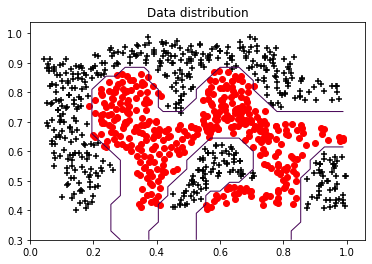

In [132]:
h = .03  # step size in the mesh

xx, yy = np.meshgrid(np.arange(0, 1, h), np.arange(0.3, 1, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt = plot_data(X2, Y2)  

plt.contour(xx, yy, Z, [0.5], linewidths=1)
plt.show()


(211, 2) (211, 1) (200, 2) (200, 1)


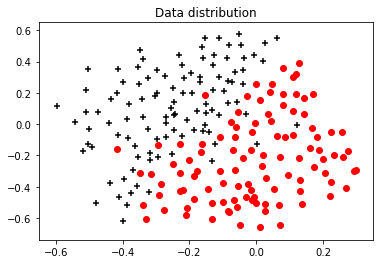

In [137]:
train_data3 = scio.loadmat("./ex6data3.mat")
# print(train_data3)
X3 = train_data3['X']
X3val = train_data3['Xval']
Y3 = train_data3['y']
Y3val = train_data3['yval']
print(X3.shape, Y3.shape, X3val.shape, Y3val.shape)

plt = plot_data(X3, Y3) 
plt.show()

In [182]:
def error(predictions, yval):
    return np.mean((predictions - yval) ** 2)

def my_kernel(X1, X2):
#     print(X1, X2)
    matrix = np.zeros((len(X1), len(X2)))
    for i in range(len(X1)):
        for j in range(len(X2)):
            matrix[i][j] = gaussian_kernel(X1[i], X2[j], my_kernel_sigma)
    return matrix

# cs = [ 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
cs = [ 0.01, 0.03, 0.1, 0.3]
sigmas = np.copy(cs)
errors = []
for c in cs:
    for sigma in sigmas:
        my_kernel_sigma = sigma
        classifier = svm.SVC(C=c, kernel=my_kernel)
        classifier.fit(X3, Y3.ravel())
        predictions = classifier.predict(X3val)
        errors.append(error(predictions, Y3val))
        
errors = np.array(errors).reshape(len(cs), len(sigmas))
print(errors)

[[0.565   0.565   0.565   0.565  ]
 [0.565   0.565   0.56305 0.49415]
 [0.565   0.565   0.4896  0.49155]
 [0.565   0.5182  0.49285 0.4909 ]]


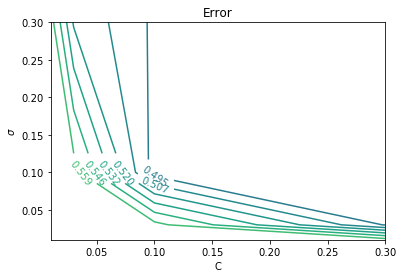

In [184]:
fig2 = plt.figure()  
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_title('Error')
ax2.set_xlabel('C')
ax2.set_ylabel(r'$\sigma$')

cs2, sigmas2 = np.meshgrid(cs, sigmas)

contour = ax2.contour(cs2, sigmas2, errors, np.logspace(-0.4, -0.2, 20))
plt.clabel(contour, inline=1, fontsize=10)
plt.show()

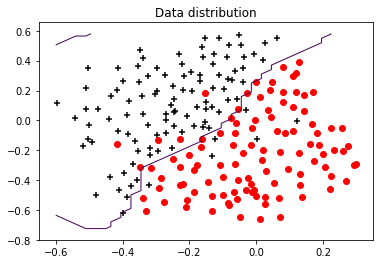

In [186]:
my_kernel_sigma = 0.1
classifier = svm.SVC(C=0.1, kernel=my_kernel)
classifier.fit(X3, Y3.ravel())

h = .03  # step size in the mesh

xx, yy = np.meshgrid(np.arange(-0.6, 0.3, h), np.arange(-0.8, 0.6, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt = plot_data(X3, Y3)  

plt.contour(xx, yy, Z, [0.5], linewidths=1)
plt.show()

#### Spam Classification

In [194]:
spam_train = scio.loadmat("./spamTrain.mat")
# print(spam_train)

Xspam_train = spam_train['X']
Yspam_train = spam_train['y']
print(Xspam_train.shape, Yspam_train.shape)

spam_test = scio.loadmat("./spamTest.mat")
# print(spam_test)

Xspam_test = spam_test['Xtest']
Yspam_test = spam_test['ytest']
print(Xspam_test.shape, Yspam_test.shape)


(4000, 1899) (4000, 1)
(1000, 1899) (1000, 1)


In [196]:
classifier = svm.SVC(C=1, kernel='rbf')
classifier.fit(Xspam_train, Yspam_train.ravel())


(4000,)
2267.51
576.416


In [198]:
def get_accuracy(predictions, Y):
    return np.sum((predictions.ravel() == Y.ravel()).astype(int)) / len(Y)

predictions = classifier.predict(Xspam_train)
print(predictions.shape)
print(Yspam_train.shape)
print(get_accuracy(predictions, Yspam_train))


predictions = classifier.predict(Xspam_test)
print(get_accuracy(predictions, Yspam_test))

(4000,)
(4000, 1)
0.99325
0.987


In [199]:
from sklearn import metrics

print(metrics.classification_report(Yspam_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       692
           1       0.99      0.97      0.98       308

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000

